# Programacion para BigData.

## Autor: Victor Simo Lozano

## Actividad 3
<p>Trabajar con los conceptos de PyCaret y AutoML.</p>
    

<hr style="border-color:red">


<h3>SOLUCION</h3>

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE</b><br>
    <p>Replicar el código del manual, pudiendose aplicar mejoras al mismo.</p>

<p style="text-align:center"><b>STEP 0: Instalación PyCaret</b></p>

Dados los conflictos que puede existir con PyCaret y la versión instalada de Python, se ha obtado por crear una imagen de python 3.8.5 con Pycaret (y jupyter) en esta.

Instalación de PyCaret mediante pip install en Dockerfile:

``
pip install pycaret
``

<p style="text-align:center"><b>STEP 1: Importar dependencias</b></p>

In [1]:
# Importaciones genéricas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div style="font-size:12px; text-align:justify">
    <p><i><b>Nota:</b> Dado que Pycaret es una libreria que requiere de gran numero de librerias de python. Estas empleadas no se ha instalado en la imagen ya que durante la instalacion de PyCaret se instalan estas librerias "basicas".</p>
</div>

Durante la creación de la imagen, no se ha instalado todas las librerias necesarias para ubuntu, dando el error *OSError: libgomp.so.1: cannot open shared object file: No such file or directory* por lo que primeramente se ejecuta dicha instalación.

``
!apt-get update && apt-get install -y libgomp1
``

Además, con la instalación de PyCaret, se ha instalado la versión de NumPy 1.23.0, lo cual nos da el error *Numba needs NumPy 1.20 or less* cuando importamos PyCaret. Para corregir esto, instalamos la versión necesaria de NumPy.

***Nota*** : *Al "rerun" todo el archivo de jupyter para la finalización de la práctica, estos requisitos ya se cumplen. Por lo que no se verá que los requisitos ya que se cumplen.*

In [2]:
np.__version__

'1.20.0'

In [3]:
! pip install numpy==1.20

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [4]:
!apt-get update && apt-get install -y libgomp1

Hit:1 http://security.debian.org/debian-security buster/updates InRelease
Hit:2 http://deb.debian.org/debian buster InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgomp1 is already the newest version (8.3.0-6).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [5]:
from pycaret import classification as pc

<p style="text-align:center"><b>STEP 2: Importar Titanic Dataset</b></p>

In [6]:
# Directorio de nuestro proyecto
! dir
# Archivos titanic
! dir ./titanic

VictorSimoLozano_A3_PBD.ipynb		logs.log
VictorSimoLozano_Actividad_5_FBD.ipynb	titanic
gender_submission.csv  result.csv  test.csv  train.csv


In [7]:
# Importar archivo train.csv en dataframe "df" e imprimir cabecera de este
df = pd.read_csv('titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p style="text-align:center"><b>STEP 3: Setup</b></p>

In [8]:
# Aunque ya se conoce el dataset, partimos de la base de que tenemos 12 columnas y 891 registros
df.shape

(891, 12)

<div style="font-size:14px; text-align:justify">
    En este punto, vamos a emplear los conocimientos de <b>AutoML</b> (Auto Machine Learning) que nos va a facilitar PyCaret.<br>
    Con la función <b>setup</b> del modulo importado pycaret.classification (como "pc") se va a poder preparar los datos para el modelado del set de datos, es por ello que esta función se ha de llamar primero de todo.<br>
    Los dos parámetros obligados que se ha de pasar a la función son:<br>
    - <b>data</b>: que como se puede entender, será el dataframe de nuestro set de datos.<br>
    - <b>target</b>: nombre de la columna destino o "y".<br>
    Setup, inferirá automáticamente los tipos de datos de las columnas basandose en ciertas propiedades. Pero estas se pueden predefinir mediante:<br>
    - <b>numeric_features</b><br>
    - <b>categorical_features</b>
    
</div>

<div style="font-size:12px; text-align:justify">
    <p><i><b>Fuente:</b>
    <a href="https://pycaret.readthedocs.io/en/latest/api/classification.html">pycaret documentation </a></p>
</div>

In [9]:
# Argumentos varios añadidos:
# ignore_features: elimina las columnas indicadas
# numeric_imputation: los valores NaN de columnas Numericas se rellenan con 'mean', 'median' o 'zero'
# normalize: permite la normalizacion de los datos si True
# nomrmalize_method: el tipo de normalizado a emplear 'minmax', 'maxabs', 'robust', 'zscore'
clf = pc.setup(data= df,
               target='Survived',
               categorical_features=['Pclass','Embarked','SibSp'],
               ignore_features=['Name','PassengerId', 'Ticket'],
               numeric_imputation='median',
               normalize=True,
               normalize_method='minmax'
              )

,Description,Value
0,session_id,4532
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


<p style="text-align:center"><b>STEP 4: Compare the model</b></p>

Mediante **compare_models** se entrena y evalua el resultado de los estimadores de la libreria.
Además, se le añade una serie de parametros para acotar nuestro estuido:
- **sort**: Permite ordenar los resultados por este indice estadístico.
- **probability_threshold**: Mover el umbral de la curva ROC.
- **n_select**: El numero de modelos top devueltos.

In [10]:
# Previo overview de la distribución de datos para 'Survived'
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Con esta instrucción, se observa que en la distribución de los datos, la mayoria de estos son para el resultado de "no superviviente". Con esto, se antepone optar por un modelo que sea capaz de ser más selectivo que preciso dado que podría no comportarse según lo esperado ante nuevos datos.

Dicho esto, para comparar nuestros modelos, se va a ordenar los resultados por 'Recall' así bajar el umbral de la curva ROC.

***Fuente***: <a href="https://builtin.com/data-science/precision-and-recall">Precision and recall</a>

In [11]:
pc.compare_models(sort='Recall', probability_threshold=0.4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.4125,0.8390,0.9915,0.3906,0.5603,0.0414,0.1104,0.1100
knn,K Neighbors Classifier,0.7605,0.8415,0.8422,0.6426,0.7253,0.5205,0.5425,0.0390
rf,Random Forest Classifier,0.7818,0.8646,0.7826,0.6905,0.7276,0.5474,0.5592,0.3470
lightgbm,Light Gradient Boosting Machine,0.8073,0.8646,0.7654,0.7432,0.7494,0.5934,0.5990,0.0320
lr,Logistic Regression,0.7912,0.8496,0.7616,0.7137,0.7333,0.5625,0.5676,1.1020
gbc,Gradient Boosting Classifier,0.8058,0.8733,0.7361,0.7524,0.7408,0.5858,0.5895,0.1090
et,Extra Trees Classifier,0.7753,0.8395,0.7359,0.6979,0.7089,0.5273,0.5360,0.2960
lda,Linear Discriminant Analysis,0.7977,0.8427,0.7109,0.7498,0.7221,0.5644,0.5715,0.0200
dt,Decision Tree Classifier,0.7754,0.7622,0.7016,0.7181,0.6981,0.5209,0.5324,0.0160
ridge,Ridge Classifier,0.8073,0.0000,0.6978,0.7817,0.7292,0.5814,0.5900,0.0130


CustomProbabilityThresholdClassifier(algorithm='SAMME.R', base_estimator=None,
                                     classifier=AdaBoostClassifier(algorithm='SAMME.R',
                                                                   base_estimator=None,
                                                                   learning_rate=1.0,
                                                                   n_estimators=50,
                                                                   random_state=4532),
                                     learning_rate=1.0, n_estimators=50,
                                     probability_threshold=0.4,
                                     random_state=4532)

Para esta replica del manual, no se obtiene los mismos resultado que esta dado que este setup se ha hecho con prámetros diferentes con la intención de tratar de mejorar el resultado de predicción. Además, incluso así, con cada ejecución de *compare_models()* se obtiene unos resultados diferentes.

***Nota:*** *Como top, se ha obtenido 'ada', 'lightgbm', 'knn' y 'lr' en la mayoria de las ejecuciones realizadas. Los siguientes pasos se realizarán con estos modelos.*

Para intentar ser aún más acertados, se creará el modelo en bucle con un **learning_rate** y **probability_threshold** que irá variando. Estos resultados se plotearán para posteriormente intentar decidir el mejor valor de **probability_threshold**.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.8494,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6190,0.7185,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6190,0.8462,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6290,0.8567,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6290,0.8484,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6290,0.7614,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6290,0.9064,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6290,0.8796,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6129,0.7807,0.0000,0.0000,0.0000,0.0000,0.0000


<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


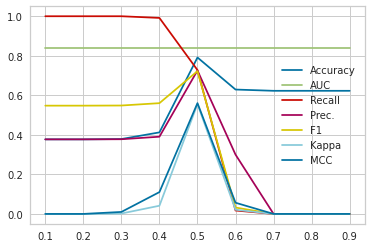

In [12]:
# Estimación de "probability_threshold" con el modelo ada

models_ada = []
results_ada = []

for i in np.arange(0.1,1,0.1):
    model = pc.create_model('ada', probability_threshold=i)
    # Guardar resultados
    model_results = pc.pull().loc[['Mean']]
    models_ada.append(model)
    results_ada.append(model_results)
    
results_ada = pd.concat(results_ada, axis=0)
results_ada.index = np.arange(0.1,1,0.1)
results_ada.plot()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7302,0.8066,0.3333,0.8889,0.4848,0.3497,0.4270
1,0.7619,0.8066,0.3750,1.0000,0.5455,0.4262,0.5204
2,0.7460,0.9156,0.3333,1.0000,0.5000,0.3824,0.4862
3,0.7903,0.9008,0.4783,0.9167,0.6286,0.5019,0.5534
4,0.7258,0.8679,0.2609,1.0000,0.4138,0.3075,0.4262
5,0.7903,0.8562,0.4783,0.9167,0.6286,0.5019,0.5534
6,0.8065,0.8863,0.5652,0.8667,0.6842,0.5534,0.5797
7,0.7419,0.8384,0.3478,0.8889,0.5000,0.3682,0.4418
8,0.7258,0.8169,0.3333,0.8889,0.4848,0.3470,0.4245


<AxesSubplot:>

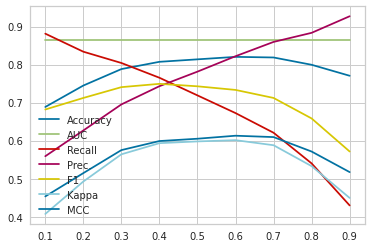

In [13]:
# Estimación de "probability_threshold" con el modelo lightgbm

models_nb = []
results_nb = []

for i in np.arange(0.1,1,0.1):
    model = pc.create_model('lightgbm', probability_threshold=i)
    # Guardar resultados
    model_results = pc.pull().loc[['Mean']]
    models_nb.append(model)
    results_nb.append(model_results)
    
results_nb = pd.concat(results_nb, axis=0)
results_nb.index = np.arange(0.1,1,0.1)
results_nb.plot()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6825,0.8542,0.1667,1.0000,0.2857,0.1985,0.3319
1,0.6508,0.8275,0.1250,0.7500,0.2143,0.1183,0.1979
2,0.6508,0.9054,0.1250,0.7500,0.2143,0.1183,0.1979
3,0.6774,0.8829,0.1739,0.8000,0.2857,0.1766,0.2630
4,0.6129,0.7620,0.0435,0.3333,0.0769,-0.0095,-0.0176
5,0.6935,0.8233,0.1739,1.0000,0.2963,0.2094,0.3420
6,0.6935,0.8986,0.1739,1.0000,0.2963,0.2094,0.3420
7,0.6290,0.8367,0.0870,0.5000,0.1481,0.0430,0.0701
8,0.6935,0.7670,0.2083,1.0000,0.3448,0.2439,0.3727


<AxesSubplot:>

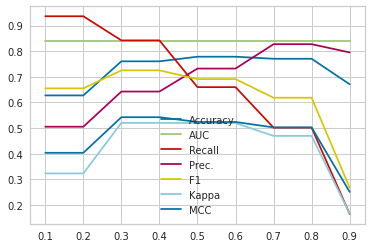

In [14]:
# Estimación de "probability_threshold" con el modelo knn

models_knn = []
results_knn = []

for i in np.arange(0.1,1,0.1):
    model = pc.create_model('knn', probability_threshold=i)
    # Guardar resultados
    model_results = pc.pull().loc[['Mean']]
    models_knn.append(model)
    results_knn.append(model_results)
    
results_knn = pd.concat(results_knn, axis=0)
results_knn.index = np.arange(0.1,1,0.1)
results_knn.plot()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6825,0.8622,0.1667,1.0000,0.2857,0.1985,0.3319
1,0.6508,0.8077,0.0833,1.0000,0.1538,0.1012,0.2308
2,0.6508,0.8996,0.0833,1.0000,0.1538,0.1012,0.2308
3,0.7419,0.8328,0.3043,1.0000,0.4667,0.3550,0.4646
4,0.6290,0.8657,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6935,0.7347,0.1739,1.0000,0.2963,0.2094,0.3420
6,0.7097,0.9164,0.2174,1.0000,0.3571,0.2590,0.3857
7,0.6935,0.8629,0.2174,0.8333,0.3448,0.2260,0.3133
8,0.6774,0.7708,0.2083,0.8333,0.3333,0.2112,0.2999


<AxesSubplot:>

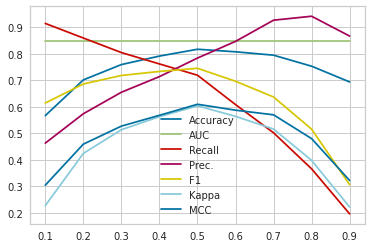

In [15]:
# Estimación de "probability_threshold" con el modelo lr

models_lr = []
results_lr = []

for i in np.arange(0.1,1,0.1):
    model = pc.create_model('lr', probability_threshold=i)
    # Guardar resultados
    model_results = pc.pull().loc[['Mean']]
    models_lr.append(model)
    results_lr.append(model_results)
    
results_lr = pd.concat(results_lr, axis=0)
results_lr.index = np.arange(0.1,1,0.1)
results_lr.plot()

Tras la ejecución, se considera establecer el umbral en **0.48**. Una vez hecho, se compara los modelos obteniendo el top 3 de estos.

In [16]:
top_3=pc.compare_models(sort='Recall', probability_threshold=0.48, n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.4269,0.8390,0.9705,0.3949,0.5610,0.0536,0.1270,0.1210
lr,Logistic Regression,0.8137,0.8496,0.7317,0.7685,0.7452,0.5991,0.6037,0.0110
lightgbm,Light Gradient Boosting Machine,0.8106,0.8646,0.7317,0.7679,0.7434,0.5941,0.6008,0.0440
rf,Random Forest Classifier,0.8090,0.8646,0.7315,0.7610,0.7369,0.5884,0.5980,0.1670
dt,Decision Tree Classifier,0.7754,0.7622,0.7016,0.7181,0.6981,0.5209,0.5324,0.0070
ridge,Ridge Classifier,0.8073,0.0000,0.6978,0.7817,0.7292,0.5814,0.5900,0.0050
lda,Linear Discriminant Analysis,0.7977,0.8427,0.6978,0.7594,0.7188,0.5624,0.5704,0.0470
gbc,Gradient Boosting Classifier,0.8298,0.8733,0.6975,0.8316,0.7515,0.6247,0.6358,0.1470
et,Extra Trees Classifier,0.7817,0.8395,0.6975,0.7215,0.7017,0.5310,0.5378,0.3460
knn,K Neighbors Classifier,0.7785,0.8415,0.6598,0.7323,0.6912,0.5196,0.5239,0.0140


Con este ajuste en el umbral, se ha cambiado el orden del top así como del resto de modelos.

"*Ada Boost Classifier*", sigue siendo el primero aunque su precisión y exactitud son de las más bajas.

Con estos resultados, se decide volver a comparar modelos y eliminar "*Ridge Classifier*" al obtener un 0 en AUC, "*Ada Boost Classifier*" dados sus resultados para el resto de valores y "*SVM - Linear Kernel*" por el mismo motivo de 0 en AUC.

In [17]:
top_3=pc.compare_models(sort='Recall', exclude = ['ridge', 'ada', 'svm'], probability_threshold=0.48, n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8137,0.8496,0.7317,0.7685,0.7452,0.5991,0.6037,0.0110
lightgbm,Light Gradient Boosting Machine,0.8106,0.8646,0.7317,0.7679,0.7434,0.5941,0.6008,0.0150
rf,Random Forest Classifier,0.8090,0.8646,0.7315,0.7610,0.7369,0.5884,0.5980,0.1070
dt,Decision Tree Classifier,0.7754,0.7622,0.7016,0.7181,0.6981,0.5209,0.5324,0.0060
lda,Linear Discriminant Analysis,0.7977,0.8427,0.6978,0.7594,0.7188,0.5624,0.5704,0.0090
gbc,Gradient Boosting Classifier,0.8298,0.8733,0.6975,0.8316,0.7515,0.6247,0.6358,0.0400
et,Extra Trees Classifier,0.7817,0.8395,0.6975,0.7215,0.7017,0.5310,0.5378,0.0990
knn,K Neighbors Classifier,0.7785,0.8415,0.6598,0.7323,0.6912,0.5196,0.5239,0.0140
qda,Quadratic Discriminant Analysis,0.6372,0.5846,0.3795,0.5793,0.4110,0.1828,0.2049,0.0080
nb,Naive Bayes,0.6582,0.7793,0.1275,0.7044,0.2105,0.1263,0.2005,0.0060


<p style="text-align:center"><b>STEP 5: Create the model</b></p>

Este paso, dado que ya se ha comparado los modelos y en **top_3** se ha obtenido los 3 mejores modelos ya entrenados. No se necesita crear nuevamente el modelo como nos aconseja el creador de PyCaret:
"*The returned objects are trained models, you really don’t need to call create_model again to train them*"

***Fuente***: <a href="https://towardsdatascience.com/5-things-you-are-doing-wrong-in-pycaret-e01981575d2a">5 things you are doing wrong in pycaret</a>

<p style="text-align:center"><b>STEP 6: Tune the model</b></p>

En este paso se va a optimizar los modelos top 3 en base a 'Recall'

In [18]:
# Tune de lr
top_3[0]=pc.tune_model(top_3[0], optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8579,0.8333,0.8000,0.8163,0.6995,0.6999
1,0.7302,0.7799,0.5833,0.6667,0.6222,0.4138,0.4160
2,0.8413,0.9081,0.7917,0.7917,0.7917,0.6635,0.6635
3,0.8548,0.8406,0.7826,0.8182,0.8000,0.6862,0.6866
4,0.8548,0.8467,0.7391,0.8500,0.7907,0.6804,0.6843
5,0.6935,0.7469,0.6522,0.5769,0.6122,0.3605,0.3623
6,0.8226,0.9231,0.8696,0.7143,0.7843,0.6361,0.6450
7,0.8065,0.8629,0.8696,0.6897,0.7692,0.6063,0.6184
8,0.7258,0.7303,0.7083,0.6296,0.6667,0.4352,0.4373


In [19]:
# Tune de lightgbm
top_3[1]=pc.tune_model(top_3[1], optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8424,0.7500,0.7826,0.7660,0.6268,0.6272
1,0.7460,0.8291,0.5833,0.7000,0.6364,0.4437,0.4481
2,0.8889,0.9081,0.8333,0.8696,0.8511,0.7625,0.7630
3,0.9032,0.9320,0.7826,0.9474,0.8571,0.7850,0.7932
4,0.8710,0.8868,0.6957,0.9412,0.8000,0.7079,0.7255
5,0.7581,0.8372,0.6087,0.7000,0.6512,0.4674,0.4700
6,0.8548,0.9041,0.7826,0.8182,0.8000,0.6862,0.6866
7,0.8226,0.8411,0.7391,0.7727,0.7556,0.6164,0.6168
8,0.8065,0.8454,0.7083,0.7727,0.7391,0.5857,0.5871


In [20]:
# Tune de rf
top_3[2]=pc.tune_model(top_3[2], optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3810,0.5000,1.0000,0.3810,0.5517,0.0000,0.0000
1,0.3810,0.5000,1.0000,0.3810,0.5517,0.0000,0.0000
2,0.3810,0.5000,1.0000,0.3810,0.5517,0.0000,0.0000
3,0.3710,0.5000,1.0000,0.3710,0.5412,0.0000,0.0000
4,0.3710,0.5000,1.0000,0.3710,0.5412,0.0000,0.0000
5,0.3710,0.5000,1.0000,0.3710,0.5412,0.0000,0.0000
6,0.3710,0.5000,1.0000,0.3710,0.5412,0.0000,0.0000
7,0.3710,0.5000,1.0000,0.3710,0.5412,0.0000,0.0000
8,0.3871,0.5000,1.0000,0.3871,0.5581,0.0000,0.0000


Se observa como, salvo en rf que se obtiene resultados dispares, los valores han sufrido modificaciones que mejoran los resultados.

<p style="text-align:center"><b>STEP 7: Plot the model</b></p>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


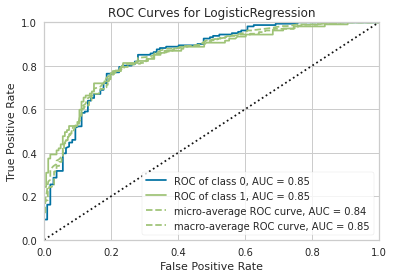

In [21]:
pc.plot_model(top_3[0], plot='auc')

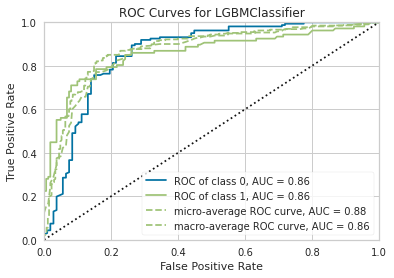

In [22]:
pc.plot_model(top_3[1], plot='auc')

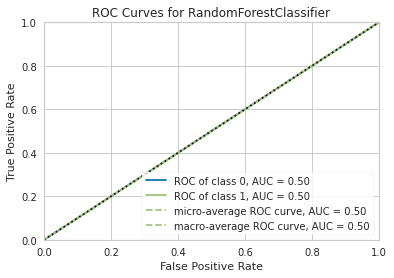

In [23]:
pc.plot_model(top_3[2], plot='auc')

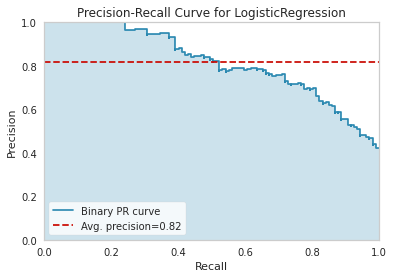

In [24]:
pc.plot_model(top_3[0], plot='pr')

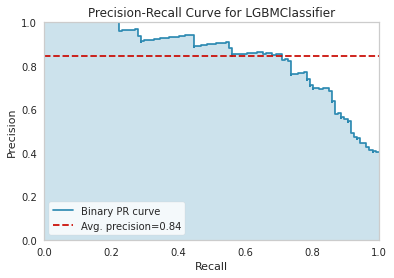

In [25]:
pc.plot_model(top_3[1], plot='pr')

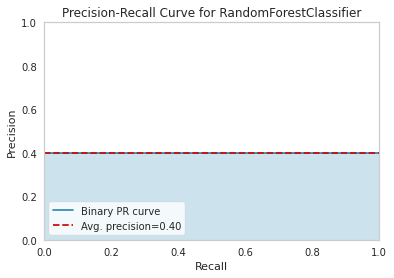

In [26]:
pc.plot_model(top_3[2], plot='pr')

<p style="text-align:center"><b>STEP 8: evaluate the model</b></p>

En base a las graficas mostradas y a los datos obtenidos, como decisión final, se decide crear la predicción con "*Light Gradient Boosting Machine*".

In [27]:
pc.evaluate_model(top_3[1])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<p style="text-align:center"><b>STEP 9: Cargamos los datos test</b></p>

In [28]:
test_data=pd.read_csv('titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<p style="text-align:center"><b>STEP 10: Predecimos con el modelo</b></p>

In [29]:
prediccion=pc.predict_model(top_3[0], data=test_data)
prediccion

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.8239
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0.5461
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.8121
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8594
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.8102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.8669
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9855
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.8974
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.8669


In [30]:
prediccion=prediccion[['PassengerId','Label']]
prediccion

,PassengerId,Label
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<p style="text-align:center"><b>STEP 11: Submissions</b></p>

In [31]:
submission=pd.read_csv('titanic/gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [32]:
submission['PassengerId']=prediccion['PassengerId']
submission.Survived=prediccion.Label
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<p style="text-align:center"><b>STEP 12: Creacion de archivo .csv</b></p>

In [33]:
submission.to_csv('titanic/result.csv', index=False)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

/usr/local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * co

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 

/usr/local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * co

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

/usr/local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:84

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

/usr/local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3

<div style="font-size:14px; text-align:justify"><b>SEGUNDA PARTE</b><br>
    <p>Contesta a las siguientes preguntas.</p>

**Pregunta 1:** ¿Te costó esfuerzo aprender el presente tema?

**Respuesta:**

Aprender a usar PyCaret no resulta dificil, como cualquier otra libreria de Python, requiere conocer sus parámetros para las funciones que tiene que con práctica se acaba conociendo.

Lo "dificil" de este tema, son los conocimientos de estadística y conocer los parámetros o puntos caracteristicos de cada set de datos. Pero igual que con PyCaret, con leidas y práctica se acaba conociendo.

**Pregunta 2:** ¿Qué te ha llamado la atención de PyCaret?

**Respuesta:**

Varias cosas. La primera de ellas, todas las librerias que se instala con simplemente ``pip install pycaret``, pero es entendible dada la potencia que tiene esta libreria.

También me ha llamado la atención la problemática que puede surgir a la hora de instalar la libreria. Lo cual ha sido motivo para crear una imagen de Python 3.8.5 con PyCaret, y aun así con la libreria de NumPy ha existido problemas como se comenta en las primeras celdas del Notebook. Pero todo ello, no desvalua el poder que tiene PyCaret y por se ve reflejado en el gran uso que se le da.

Por último, y lo mejor, el potencial que tiene y como en pocas lineas de código te permite crear modelos y plotear gráficas y con "pequeños" ajustes, obtener nueva spredicciones y con resultados diferentes.

**Pregunta 3:**  ¿Notas que es más simple haciéndolo así que como se hizo en Fundamentos de Big Data?

**Respuesta:**

Es mucho más simple como se ha comentado previamente, pero si que se ha de conocer en más detalle PyCaret, además de la estadística. Pero sin duda, con "pocos" conocimientos se obtiene grandes resultados.

**Pregunta 4:** Busca más herramientas AutoML que existan y enumera alguna

**Respuesta:**

- H2O AutoML
- Auto-ViML
- TensorFlow


***Fuente***:

<a href="https://analyticsindiamag.com/tensorflow-vs-pycaret-a-comparison-of-machine-learning-frameworks/">TensorFlow vs PyCaret</a>

<a href="https://www.analyticsvidhya.com/blog/2020/12/top-8-low-code-no-code-ml-libraries-every-data-scientist-should-know/">Top lox-code ML libraries</a>

<div style="font-size:14px; text-align:justify"><b>TERCERA PARTE</b><br>
    <p>Haz una busqueda en internet y realiza un resumen acerca de AUC y la curva ROC.</p>

La curva **ROC** permite ver cuán bueno es un modelo para distinguir entre dos opciones. De modo que la *precisión* de un modelo es lo que permitirá que sea mejor o peor.

Esta curva, está definida por la sensibilidad (verdaderos positivos) y 1-especifidad (falsos positivos)

Por lo que la curva ROC esta definida por la sensibilidad que es la tasa de verdadero positivo y “1 – especificidad” es la tasa de falso positivo.

El **AUC** se trata del área que queda bajo la curva ROC. Donde los valores que se aproximan a 1 son los ideales y el modelo discierne con exactitud los positivos de negativos.

**Fuente:** <a href="https://aprendeia.com/curvas-roc-y-area-bajo-la-curva-auc-machine-learning/">Aprendeia</a>

<div style="font-size:14px; text-align:justify"><b>CUARTA PARTE</b><br>
    <p>Haz una busqueda en internet y realiza un resumen acerca de la <i>Confusuion Matrix</i>.</p>

Para la evaluación de un modelo, se puede obtener cuatro tipos de resultados para los valores predecidos respecto a los valores reales:

- True Positive (TP): Valores predecidos verdaderos que son verdaderos.
- True Negative (TN): Valores predecidos negativos que son negativos.
- False Positive (FP): Valores predecidos positivos que son negativos.
- False Negative (FN): Valores predecidos negativos que son positivos.

Esta matriz nos da valores estadisticos como:
- Recall (Exhaustividad): Cantidad que el modelo puede identificar.
- Precision (Precisión): Calidad del modelo en la clasificación.
- Accuracy (Exactitud): Porcentaje de casos acertados.
- F-measure (Valor-F): Combina Precision y Recall en una.

<div style="font-size:14px; text-align:justify"><b>QUINTA PARTE</b><br>
    <p>Adjunta un pantallazo del resultado del modelo en Kaggle.</p>

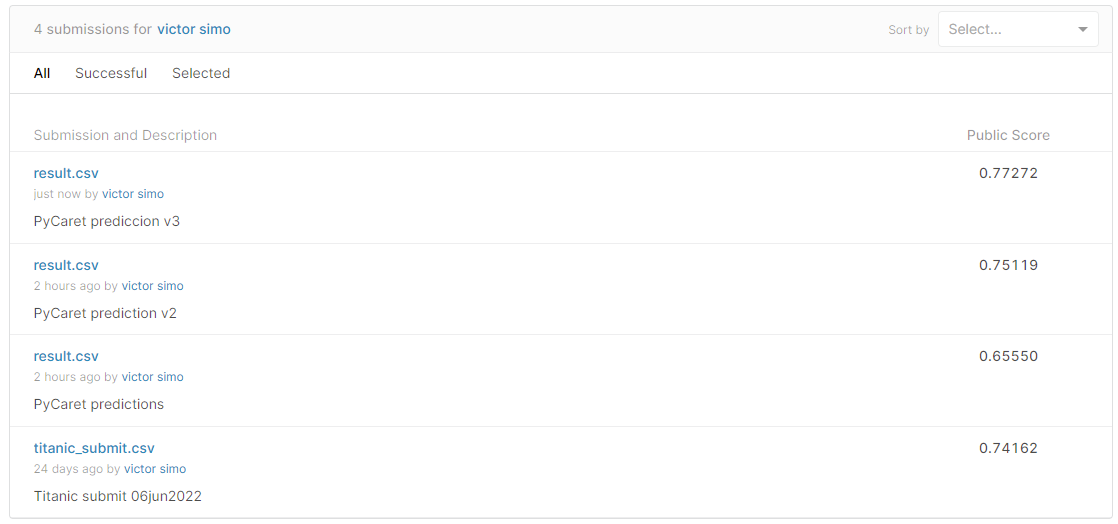

En resumen, respecto a la primera predicción creada sin AutoML, se obtuvo un 0.74 de precisión y con PyCaret y otro punto de vista, un 0.77.

Se ve como además se ha realizado varias entregas para esta práctica, y en base a realizar pequeños cambios, se ha ido mejorando el resultado.